In [67]:
# Imports
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import pandas as pd
from GenomeSigInfer.vcf import VCFMatrixGenerator
from GenomeSigInfer.utils.helpers import COLOR_DICT_MUTATION

In [3]:
vcf_files = ["../../data/vcf/WES_Other.20180327.simple", "../../data/vcf/WGS_Other.20180413.simple"]
genome = "GRCh37"
filtered_vcf = VCFMatrixGenerator.filter_vcf_files(vcf_files, genome)

2024-01-04 15:18:36 - INFO - Created a large VCF containing 10343323 mutations


In [142]:
count_df = pd.DataFrame((filtered_vcf.iloc[:, 8] + ">" +  filtered_vcf.iloc[:, 9]).value_counts()).sort_index()

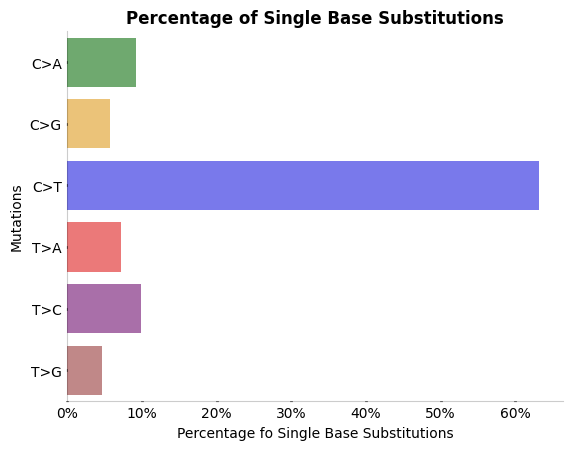

In [150]:
count_df["Percentage"] = count_df[0] / count_df[0].sum() * 100
names = count_df.index.to_list()
values = count_df["Percentage"].to_list()
ax = sns.barplot(
    y=names,
    x=values,
    orient="h",
    hue=names,
    palette=list(COLOR_DICT_MUTATION.values()),
    legend=False,
    alpha=0.6,
    linewidth=0,
)
plt.xlabel("Percentage fo Single Base Substitutions")
plt.ylabel("Mutations")
plt.title(f"Percentage of Single Base Substitutions", fontweight="bold")
ax.spines['top'].set_alpha(0)
ax.spines['bottom'].set_alpha(0.2)
ax.spines['right'].set_alpha(0)
ax.spines['left'].set_alpha(0.2)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}%"))
ax.tick_params(axis='both', which='both', color=(0, 0, 0, 1), length=0.4, width=2)
plt.show()